# Определение возраста покупателей

## Исследовательский анализ данных

In [2]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

Found 7591 validated image filenames.


В наборе данных около 7500 изображений. Посмотрим на распределение возрастов.

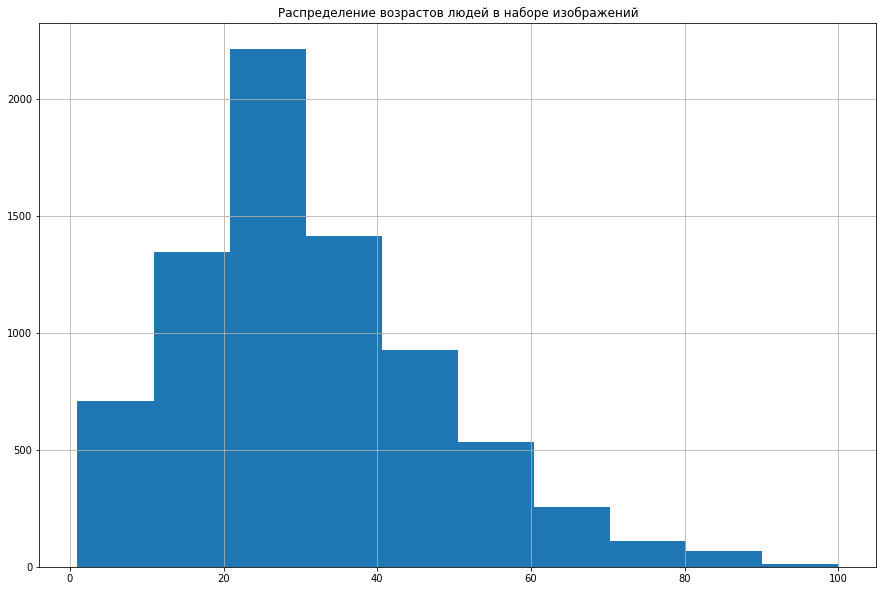

In [14]:
fig = plt.figure(figsize=(15,10))
labels.real_age.hist(bins=10)
plt.title('Распределение возрастов людей в наборе изображений')
plt.show()

Видим, что больше 30% составляют изображения людей в возрасте от 20 до 30. Меньше всего пожилых людей старше 80 лет.

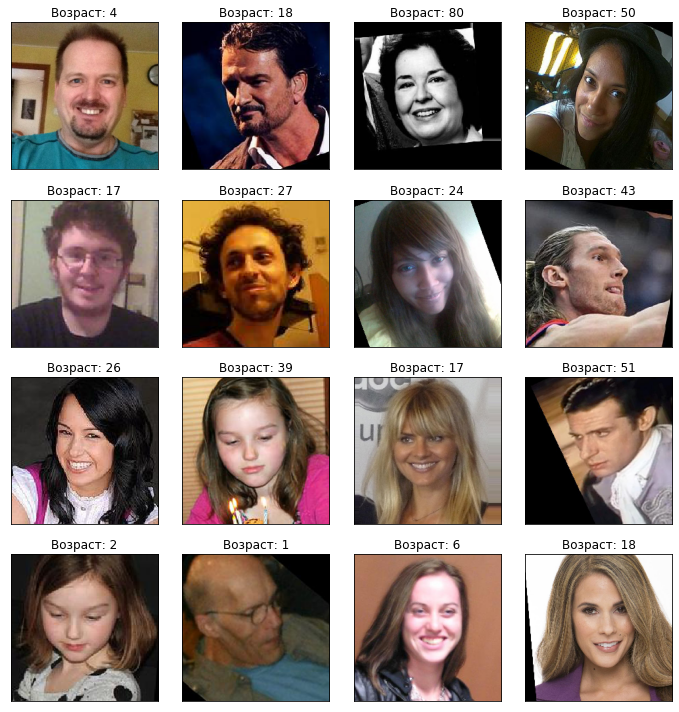

In [25]:
fig = plt.figure(figsize=(10,10))
for i in range(16):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(np.array(train_gen_flow[i][0][0][:]))
    plt.xticks([])
    plt.yticks([])
    plt.title(f'Возраст: {labels.real_age[i]}')
    plt.tight_layout()

В датасете представленые цветные изображения людей разного пола, на различном фоне. Часть изображений повернута влево или вправо.

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python
import pandas as pd
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)
    train_data = train_datagen.flow_from_dataframe(dataframe=labels, directory=path + 'final_files/',
        x_col='file_name', y_col='real_age', target_size=(224, 224), batch_size=16, class_mode='raw', subset='training',
        seed=12345)
    return train_data


def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)
    test_data = test_datagen.flow_from_dataframe(dataframe=labels, directory=path + 'final_files/',
        x_col='file_name', y_col='real_age', target_size=(224, 224), batch_size=16, class_mode='raw', subset='validation',
        seed=12345)
    return test_data


def create_model(input_shape):

    optimizer = Adam(lr=0.0001)
    backbone = ResNet50(input_shape=input_shape,
                    weights='imagenet', 
                    include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(units=1, activation='relu')) 
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae']) 
              
    return model


def train_model(model, train_data, test_data, batch_size=None, epochs=30, steps_per_epoch=None, validation_steps=None):

    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(train_data,
          validation_data=test_data,
          batch_size=batch_size,
          epochs=epochs,
          steps_per_epoch=steps_per_epoch,
          validation_steps=validation_steps, verbose=2)
    
    return model

```

```
Train for 356 steps, validate for 119 steps
Epoch 1/30
356/356 - 49s - loss: 226.7539 - mae: 10.7954 - val_loss: 642.5091 - val_mae: 20.3455
Epoch 2/30
356/356 - 40s - loss: 69.2829 - mae: 6.3013 - val_loss: 142.9276 - val_mae: 9.0677
Epoch 3/30
356/356 - 40s - loss: 38.6275 - mae: 4.7173 - val_loss: 95.1768 - val_mae: 7.5579
Epoch 4/30
356/356 - 40s - loss: 25.5070 - mae: 3.8877 - val_loss: 85.7020 - val_mae: 7.0908
Epoch 5/30
356/356 - 40s - loss: 19.3582 - mae: 3.4070 - val_loss: 70.7283 - val_mae: 6.3698
Epoch 6/30
356/356 - 40s - loss: 16.1376 - mae: 3.0611 - val_loss: 80.7646 - val_mae: 6.7376
Epoch 7/30
356/356 - 40s - loss: 12.1100 - mae: 2.6259 - val_loss: 73.8595 - val_mae: 6.5236
Epoch 8/30
356/356 - 40s - loss: 9.8027 - mae: 2.3557 - val_loss: 72.6754 - val_mae: 6.4235
Epoch 9/30
356/356 - 39s - loss: 8.4713 - mae: 2.2234 - val_loss: 72.7803 - val_mae: 6.4334
Epoch 10/30
Epoch 11/30
356/356 - 40s - loss: 8.2972 - mae: 2.2024 - val_loss: 72.3184 - val_mae: 6.5132
356/356 - 40s - loss: 8.6203 - mae: 2.2203 - val_loss: 67.3812 - val_mae: 6.1962
Epoch 12/30
356/356 - 40s - loss: 9.1563 - mae: 2.3108 - val_loss: 71.5902 - val_mae: 6.4605
Epoch 13/30
356/356 - 40s - loss: 9.8580 - mae: 2.3276 - val_loss: 77.6961 - val_mae: 6.6753
Epoch 14/30
356/356 - 39s - loss: 9.5724 - mae: 2.3669 - val_loss: 70.9166 - val_mae: 6.4744
Epoch 15/30
356/356 - 40s - loss: 9.7335 - mae: 2.3635 - val_loss: 67.9576 - val_mae: 6.2188
Epoch 16/30
356/356 - 40s - loss: 8.4327 - mae: 2.1983 - val_loss: 66.7785 - val_mae: 6.1349
Epoch 17/30
356/356 - 40s - loss: 7.7032 - mae: 2.0710 - val_loss: 67.8608 - val_mae: 6.0932
Epoch 18/30
356/356 - 40s - loss: 7.0629 - mae: 2.0056 - val_loss: 83.0231 - val_mae: 7.0756
Epoch 19/30
356/356 - 40s - loss: 6.3673 - mae: 1.9131 - val_loss: 75.0201 - val_mae: 6.2662
Epoch 20/30
356/356 - 40s - loss: 5.6061 - mae: 1.8090 - val_loss: 65.7882 - val_mae: 6.2443
Epoch 21/30
356/356 - 40s - loss: 5.0651 - mae: 1.7218 - val_loss: 65.2914 - val_mae: 6.1250
Epoch 22/30
356/356 - 40s - loss: 5.1257 - mae: 1.7195 - val_loss: 66.9331 - val_mae: 6.2471
Epoch 23/30
356/356 - 40s - loss: 5.5186 - mae: 1.7968 - val_loss: 70.6428 - val_mae: 6.1825
Epoch 24/30
356/356 - 40s - loss: 5.9198 - mae: 1.8289 - val_loss: 84.7362 - val_mae: 7.1455
Epoch 25/30
356/356 - 40s - loss: 5.9382 - mae: 1.8233 - val_loss: 64.2767 - val_mae: 6.0860
Epoch 26/30
356/356 - 39s - loss: 5.3274 - mae: 1.7487 - val_loss: 66.2940 - val_mae: 6.1714
Epoch 27/30
356/356 - 39s - loss: 4.5960 - mae: 1.6198 - val_loss: 63.0387 - val_mae: 5.9389
Epoch 28/30
356/356 - 40s - loss: 4.7845 - mae: 1.6478 - val_loss: 63.3651 - val_mae: 5.9691
Epoch 29/30
356/356 - 40s - loss: 5.4587 - mae: 1.7601 - val_loss: 64.2301 - val_mae: 6.0466
Epoch 30/30
356/356 - 39s - loss: 13.6893 - mae: 2.6976 - val_loss: 66.2595 - val_mae: 6.0439

119/119 - 10s - loss: 66.2595 - mae: 6.0439
Test MAE: 6.0439
```

## Анализ обученной модели

Модель со значением learning rate 0.0001 удается обучить до нужного значения метрики за меньшее число шагов, чем при learning rate равном 0.001. В целом, видно, что за первые 5 эпох модель достигает значения метрики MAE не сильно отличающегося от аналогичного за 30 эпох.

Обученная модель определяет возраст и в среднем ошибается не более чем на 6 лет. Данный показатель удовлетворяет требованиям задачи и мы можем использовать модель для решения поставленной задачи.